# Assignment 1.1: Exploring WS and BA models


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 


> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The Random network model doesn't reflect the disparities between different individuals when it comes to their number of connections/friedns. According to the model, for an average number of connections a person has (\<k>) , the dispersion (σk = ‹k›1/2 ) would be around 31.62. 

So the number of friends a typical individual has would tipically vary between 968 and 1032. Whis is far from the truth as many people have many more friends or connections (for example, the large number of people that reach facebook's limit of 5000 friends) and others have significantly less by living isolated more lives.

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

The 4 regimes in the evolution of a random network:

- **Subcritical: 0 < k < 1:**
    - Each node has, on average, less than one link
    - These networks have multiple tiny and disconnected clusters
    - They don't present giant components
- **Critical Point: <k> = 1:**
    
    - On average each node is connected to 1 single node
    - The largest component contains only a small fraction of the nodes (NG​∼N^(2/3)) 
    - The network shows a wider range of sizes
    - This point separates the regime where there isn't a giant component, from the one where there is one

- **Supercritical: <k> > 1:** 
    - Includes a giant component
    - Made up of mostly trees, small elements are residual
    - The higher <k> is (furtehr away from the threshold), the bigger the gian component becomes

- **Connected <k> > ln(N):**

    - There are no isolated nodes left as they have all been absorbed by the giant component
    - Every node can access every other node (the network is connected)
    

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

- The random network model fail to show the degree-dependent clustering observed in real-world networks. 
    - In real networks, high-degree nodes tend to have lower clustering coefficients (𝐶(𝑘) - C(k) decreases with k).
    - In a random network, 𝐶(𝑘) is independent of node degree (𝐶𝑖=𝑝=⟨𝑘⟩/𝑁).

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 


Average shortest path length for ws1: 62.88
Average shortest path length for ws2: 8.53
Average shortest path length for ws3: 4.76


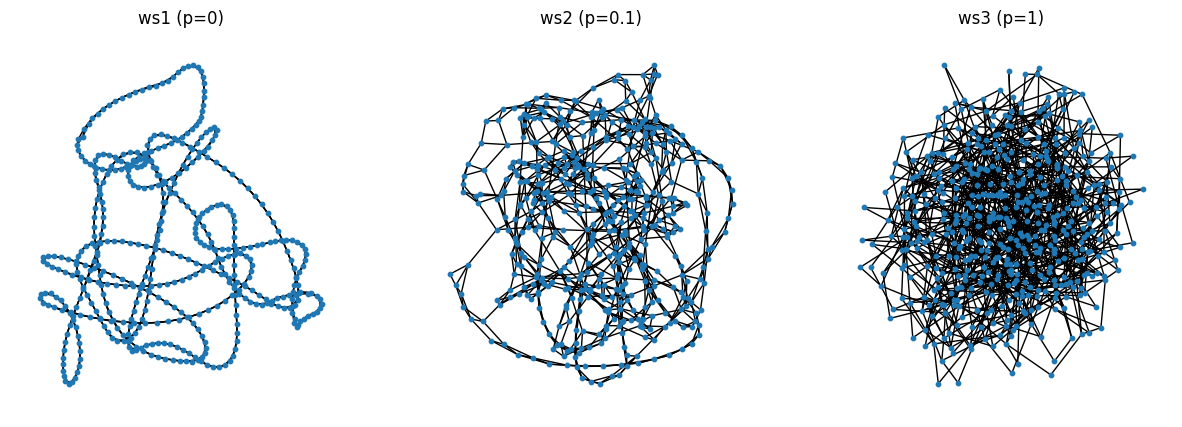

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 1
# Generating watts strogatz graph

ws1 = nx.watts_strogatz_graph(500, 4, 0)
ws2 = nx.watts_strogatz_graph(500, 4, 0.1)
ws3 = nx.watts_strogatz_graph(500, 4, 1)

# Calculate the average shortest path length
l1 = nx.average_shortest_path_length(ws1)
l2 = nx.average_shortest_path_length(ws2)
l3 = nx.average_shortest_path_length(ws3)

print(f"Average shortest path length for ws1: {l1:.2f}")
print(f"Average shortest path length for ws2: {l2:.2f}")
print(f"Average shortest path length for ws3: {l3:.2f}")

# Plotting the 3 graphs
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
nx.draw(ws1, node_size=10)
plt.title("ws1 (p=0)")
plt.subplot(1, 3, 2)
nx.draw(ws2, node_size=10)
plt.title("ws2 (p=0.1)")
plt.subplot(1, 3, 3)
nx.draw(ws3, node_size=10)
plt.title("ws3 (p=1)")
plt.show()

> * Describe what happens to the network when $p = 1$.

- If p (probability of rewiring) is 1, we get a fully random network, where all nodes are randomly linked together.
- Essentially, we get an Erdős–Rényi random network.

An example is shown below:


> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$.


p=0.1: Average shortest path length = 7.81
p=0.2: Average shortest path length = 5.86
p=0.3: Average shortest path length = 5.57
p=0.4: Average shortest path length = 5.18
p=0.5: Average shortest path length = 5.03
p=0.6: Average shortest path length = 4.86
p=0.7: Average shortest path length = 4.79
p=0.8: Average shortest path length = 4.75
p=0.9: Average shortest path length = 4.76
p=1.0: Average shortest path length = 4.76


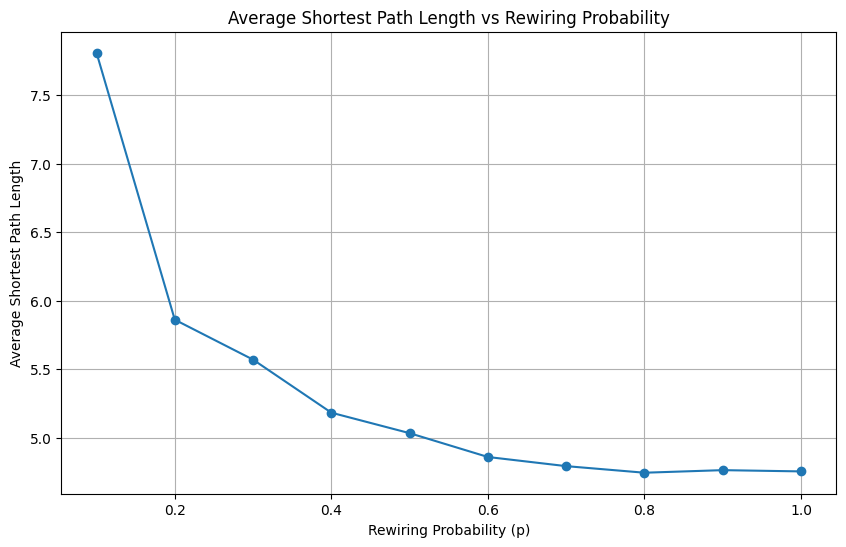

In [2]:
# Trying different value of p
# Try more values of p for finer resolution
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
avg_shortest_path_lengths = []

for p in p_values:
    ws = nx.watts_strogatz_graph(500, 4, p)
    avg_length = nx.average_shortest_path_length(ws)
    avg_shortest_path_lengths.append(avg_length)
    print(f"p={p}: Average shortest path length = {avg_length:.2f}")
    
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_shortest_path_lengths, marker='o')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()

 > * What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

- The average shortest path length reaches values close to a fully randomized network (p = 1.0) when p ≈ 0.6. 
- After this value, increasing p doesn't show a significant reduction in average path length.

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).


In [3]:
n_networks = 50
p_values = [0, 0.01, 0.03, 0.05,  0.1, 0.2]
avg_shortest_path_lengths = []
stds = []

# Generate N networks for each p and compute the average shortest path length
for p in p_values:
    lengths = []
    
    # Generate 50 networks and calculate their average shortest path lengths <d>
    for i in range(n_networks):
        ws = nx.watts_strogatz_graph(500, 4, p)
        length = nx.average_shortest_path_length(ws)
        lengths.append(length)
    avg_length = sum(lengths) / n_networks
    
    # Caculate standard deviation
    std = (sum((x - avg_length) ** 2 for x in lengths) / n_networks) ** 0.5
    
    # Save results
    avg_shortest_path_lengths.append(avg_length)
    stds.append(std)
    print(f"p={p}: Average shortest path length over {n_networks} networks = {avg_length:.2f}")
    print(f"p={p}: Standard deviation = {std:.2f}")

p=0: Average shortest path length over 50 networks = 62.88
p=0: Standard deviation = 0.00
p=0.01: Average shortest path length over 50 networks = 24.22
p=0.01: Standard deviation = 5.74
p=0.03: Average shortest path length over 50 networks = 13.13
p=0.03: Standard deviation = 1.36
p=0.05: Average shortest path length over 50 networks = 10.24
p=0.05: Standard deviation = 0.72
p=0.1: Average shortest path length over 50 networks = 7.72
p=0.1: Standard deviation = 0.33
p=0.2: Average shortest path length over 50 networks = 6.11
p=0.2: Standard deviation = 0.12


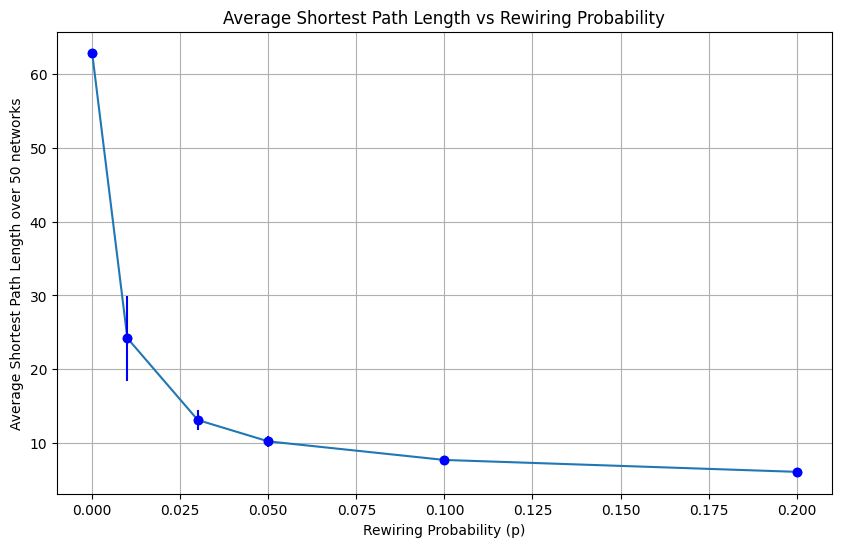

In [4]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_shortest_path_lengths, marker='o')

# Add the error bars to the plot
plt.errorbar(p_values, avg_shortest_path_lengths, yerr = stds, fmt ='o', color ='blue')

plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length over 50 networks')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()

> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.


**Average shortest path length versus rewiring probability in Watts-Strogatz networks** 

This plots presents the evolution of the average shortest path length (across 50 networks with 500 nodes each and a mean degree of 4) as a function of the rewiring probability (p). The error bars show 1 standard deviation.

- At p = 0, the network is a regular ring lattice with long path lengths (⟨d⟩ = 62.88). 
- At = 0.01 (1% of edges are rewired randomly), the path lenght decreases drastically to 23.86. 
- Around p = 0,05 (5% of edges rewired), the average shortest path length is 10.33.

This fast decrease demonstrates thethe small-world phenomenon, which shows that introducing just a few random connections into a regular network can dramatically reduce path lengths, creating "shortcuts" that strongly enable global communication among distant nodes.

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
>

> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> 

The behavior of scale-free networks depends on the degree exponent γ, with the maximum degree $k_{\max}$ being defined as:  

$$
k_{\max} = k_{\min} N^{\tfrac{1}{\gamma - 1}}
$$  

We can define three slope-dependent regimes, depending on the value of $\gamma$:

 1. **Anomalous Regime (γ ≤ 2)**
    - The average degree ⟨k⟩ diverges as \(N \to \infty\).  
    - The exponent 1/(γ− 1) in (4.18) is larger than one so the largest hub grows faster than \(N\), eventually requiring more nodes than exist.   

2. **Scale-Free Regime (2 < γ < 3)**
    - Average node link ⟨k⟩ is finite, but higher moments (such as ⟨k²⟩) do diverge.  
    - The largest hub grows sublinearly with \(N\) since the exponent will be smaller than 1, and its relative share decreases (the fraction of its connections in the network shrinks).  

3. **Random Network Regime (γ > 3)**
    - Both two first moments (⟨k⟩ and ⟨k²⟩) are finite.  
    - Hubs are small and rare because the growth of the largest node is extremely slow.  
    - As a result, these networks behave similarly to **random networks**, with the small world properties.


> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.


The probability that a new node connects to an existing node ($i$) depends on its degree ($k_i$) raised to a power ($\alpha$):

$$
\Pi(k_i) = \frac{k_i^{\alpha}}{\sum_j k_j^{\alpha}}
$$

Depending on the value of ($\alpha$), it is possible to identify 2 different non-linear regimes.  In the first one menationed, hubs are less favored and on the second one hubs are more favored when compared to the linear regime ($\alpha$ = 1).

1.  **Sublinear regime ($0 < \alpha < 1$)**

- High-degree nodes are not strongly favored compared to low-degree ones.
- The "rich-get-richer" effect is weak.
- Degree distribution is stretched exponential (not a pure power law):
$$
P(k) \sim k^{-\alpha} \exp\Big[-2 \mu(\alpha) \langle k \rangle (1-\alpha) k^{1-\alpha}\Big]
$$
- Networks are more homogeneous, hubs do not dominate.
- The size of the largest degree grows logarithmically with time:
$$
k_{\max} \sim (\ln t)^{\tfrac{1}{1 - \alpha}}
$$


2. **Superlinear regime ($\alpha > 1$)**

- High-degree nodes are disproportionately favored.
- Leads to winner-takes-all behavior, which means that one or very few nodes capture a very big fraction of all links.
- Degree distribution no longer follows a power law, instead, a single hub dominates while most nodes remain with low degree.
- The size of the largest degree grow as:
$$
k_{\max} \sim t
$$ 



# Assignment 1.2: Stats and visualization of the Rock Music Network

> Build the network of Rock Performers

In [35]:
import re
import requests
import json
import os
import random
import numpy as np
import urllib.request

Open .txt file copied from wikipedia page where links that did not correspond to music artists were removed.

In [6]:
with open("wikipage.txt", "r", encoding="utf-8") as f:
        wiki_text = f.read()

match_wiki = re.findall(r'\[\[(.*?)\]\]', wiki_text) 
print("Length of match_wiki list: ", len(match_wiki))
print("Match_wiki example element: ", match_wiki[1])

Length of match_wiki list:  488
Match_wiki example element:  10 Years (band)|10 Years


Clean artists names for next task:
- remove | and characters that come after;
- keep everything else the same so we can use this list to acess wikipedia again when creating a .txt file for each artist.

In [7]:
match_wiki_clean=[]
for m in match_wiki:
    short_m = m.split('|')[0]
    match_wiki_clean.append(short_m)

print("Match_wiki and match_wiki_clean have same klength: ", len(match_wiki_clean) == len(match_wiki))

Match_wiki and match_wiki_clean have same klength:  True


Create a .txt file for each artist:
- In Shakin Stevens wikipedia page The Rolling Stones appear as "the Rolling Stones" so files are saved in lowercase.

In [8]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"
rvslots = "rvslots=main"
headers = {"User-Agent" : "MyWikipediaClient/1.0 (example@example.com)"} # just use this dict as-is.

folder_name = "artist_texts"
os.makedirs(folder_name, exist_ok=True)

for m in match_wiki_clean:
    title = "titles=" + m
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat, rvslots)
    
    wikiresponse = requests.get(query, headers=headers)
    wikidata = wikiresponse.text
    dict_data=json.loads(wikidata)

    key_number=list(dict_data['query']['pages'].keys())[0]
    page = dict_data['query']['pages'][str(key_number)]

    if 'revisions' in page and len(page['revisions']) > 0:
        wiki_text = page['revisions'][0].get('*', '')
    else:
        wiki_text = ''
        print("No revisions found for artist " + m)

    # For AC/DC remove / 
    m = m.replace("/", "")

    # Save the file name in lowercase
    lower_case_path=m.lower()

    file_path = os.path.join(folder_name, lower_case_path+".txt")
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(wiki_text)

No revisions found for artist Crosby, Stills, Nash & Young


Crosby, Stills, Nash & Young.txt is empty since *page['revisions']* does not work for this artist wikipedia page.

Create list of artists names in lowercase:
- AC/DC is corrected;
- artists written in lower case;

The link found in wikipedia will be compared to the filename and the artist list so all must be in lowercase (including wikipedia link after being extracted).

In [9]:
match_wiki_clean_lc=[]
for match in match_wiki_clean:
    if match=='AC/DC':
        match=match.replace("/", "")
    new_match = match.lower()
    match_wiki_clean_lc.append(new_match)

print("Match_wiki and match_wiki_clean_lc have same length: ",len(match_wiki_clean_lc)==len(match_wiki))

Match_wiki and match_wiki_clean_lc have same length:  True


Create network:

In [10]:
folder_name = "artist_texts"
all_items = os.listdir(folder_name)

G = nx.DiGraph()

# Filename is in lowercase
for filename in all_items:

    # Get files text
    artist_file_path = os.path.join(folder_name, filename)
    with open(artist_file_path, "r", encoding="utf-8") as f:
        artist_text = f.read()

    # Count words 
    words = re.findall(r"[A-Za-z]+", artist_text)
    no_words=len(words)

    # Get name of node, filename is str with .txt
    artist=filename.replace(".txt", "")

    # Check if node already exits, from previous edges
    if G.has_node(artist):
        G.nodes[artist]["length_of_content"] = no_words
    else:
        G.add_node(artist,length_of_content=no_words)
    
    # Extract all links from text
    links = re.findall(r'\[\[(.*?)\]\]', artist_text)
    link_artists = set()
    
    for link in links:

        # Remove | and what comes next, make it lowercase and AC/DC
        if link == "AC/DC":
            link=link.replace("/","")
        link_short= link.split('|')[0]
        link_lower=link_short.lower() 

        # Filter links to get artists
        # Dont allow for multiple edges with same direction between the same nodes
        # Dont allow a node to reference itself
        if link_lower in match_wiki_clean_lc and link_lower not in link_artists and link_lower != artist:
            link_artists.add(link_lower)
            G.add_edge(artist,link_lower)

In [11]:
no_nodes=G.number_of_nodes()
print("Number of nodes: ", no_nodes)
print("Number of nodes is same as number of artists: ",no_nodes == len(match_wiki))

Number of nodes:  488
Number of nodes is same as number of artists:  True


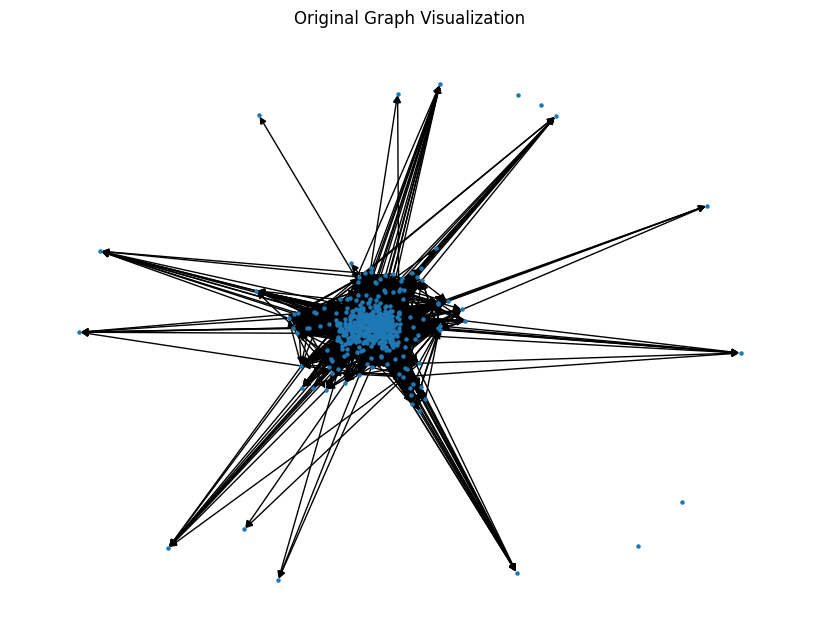

In [12]:
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=5)
plt.title("Original Graph Visualization")
plt.show()

In [13]:
isolated_nodes = list(nx.isolates(G))
print("Isolated nodes:", isolated_nodes)

Isolated nodes: ['dr. hook & the medicine show', 'england dan & john ford coley', 'jet (australian band)', 'van zant (band)']


In [14]:
G.remove_nodes_from(isolated_nodes)
print("Number of nodes after removing isolated ones: ",G.number_of_nodes())

Number of nodes after removing isolated ones:  484


In [15]:
components = list(nx.weakly_connected_components(G))
largest_component = max(components, key=len)
G_largest = G.subgraph(largest_component).copy()
print("Number of nodes of largest component: ",G.number_of_nodes())

Number of nodes of largest component:  484


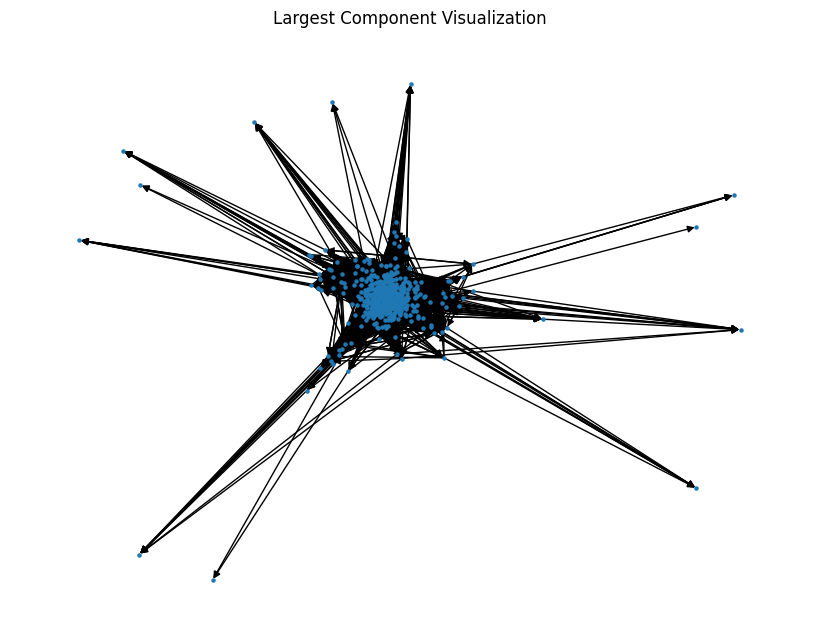

In [16]:
plt.figure(figsize=(8, 6))
nx.draw(G_largest, node_size=5)
plt.title("Largest Component Visualization")
plt.show()

We will now save our network in GraphML format. 


In [33]:
nx.write_graphml(G_largest, "rock_artists.graphml")

> *Exercises*: Explain your process in words

> * First, simply describe the steps of the process (what you did, step by step)

The first step was to copy the content of the Wikipedia page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers to a text file, delete the markup that did not correspond to artists' names and extract all links using regular expressions. Some of these non-artist links were only found while doing the exercise and removed later. In the end, 488 artist links were found and saved in the *match_wiki* variable. 

Following this, for each artist found, we downloaded its Wikipedia page text using the Wikipedia API and saved it as an individual text file. A cleaned artist list was created (*match_wiki_clean*) where names like *10 Years (band)|10 Years* were reduced to *10 Years (band)* to be used to create the filename of the text file, which cannot contain special characters, and as the title of the wiki API query, since using 10 Years (band)|10 Years or 10 Years (band) redirects to the same page. At this point, we had to deal with two exceptions: the special character / had to be removed from *AC/DC*; and on *Shakin' Stevens* wikipedia page, the link to *The Rolling Stones* page was in lowercase. Therefore, we decided to work in lowercase and file names were saved in that format. For artist *Crosby, Stills, Nash & Young* the response from the API had a different structure from all the others and we could not extract its content. Since this was a unique situation, we decided to save its text file as an empty file.

Proceeding, the network was created by going through all the text files, one by one. For each text file, we created a node with the filename (artist name in lowercase), counted the number of words using regular expressions and saved that as an attribute named *length_of_content*. Then, all the links were extracted from the text file, using regular expressions once again, and filtered to extract the links that corresponded to artists of our original list. To execute this filtering, a list with all the artist names in lowercase and with *AC/DC* as *acdc* was created (*match_wiki_clean_lc*) and the links were also reformulated to deal with the *AC/DC* special case and to be shortened and converted to lowercase. We also did not allow multiple edges with the same direction between the same two artists and a node referencing itself. Within these restrictions, for each artist found, an edge between the file artist and the link artist was created. 

Lastly, the isolated nodes were identified and removed. The largest component of the network was extracted and resulted in the same number of nodes as the graph after removing its isolated nodes.


> * Then, write a short section about which part of the process that was most difficult

The most difficult part of the process was dealing with the processing of the artist names at every stage. Initially, we had to generate proper filenames without special characters. For most artists, removing the | character and the text after it was sufficient but we still had to implement a special case for AC/DC to remove the / character. Later, when analyzing isolated nodes, we noticed that *Shakin' Stevens* had The Rolling Stone link in lowercase which was not recognized as an artist during filtering. To prevent the same issue in other pages, we decided to work in lowercase and had to modify the pipeline. Overall, we had to make changes multiple times to deal with special cases and ensure that when filtering all the lists had all artists' names formatted in the same way.

> * Next write a short section about how you used LLMs to help you

LLMs were useful to understand and correct errors related to both the API query format and the API responses. The lecture from Week 1 provided us the basic structure for the workflow but some problems came up, as mentioned before with the artist *Crosby, Stills, Nash & Young* Wikipedia page, that required more specific guidance. While building the network, we also used LLMs to interpret and explain our code, without specifying its intended function. This approach helped us in identifying an unexpected behaviour or in confirming that it was functioning as intended. Additionally, we also used LLMs to suggest ways to visualize intermediate results so we could inspect and verify the middle steps.

> * Finally, compose a short section about what you would do differently if you had to do it again

If we were to do this again, we would simplify the way we handled artist name formatting throughout all the stages. Our solution to this issue was built as different problems and issues arose, so we had to reformulate our approach multiple times and for very diverse problems. For example, instead of converting names to lowercase inside the loop when creating files and then generating a separate list with all lowercase entries, we could have started with an initial list already in lowercase.

> *Exercises*: Simple network statistics and analysis.

We will start by downloading the network constructed of the Github of one of the group members.

In [44]:
url_network = "https://raw.githubusercontent.com/ritassilva/Rock-Artist-Network/main/rock_artists.graphml"
urllib.request.urlretrieve(url_network, "rock_artists.graphml")
G = nx.read_graphml("rock_artists.graphml")

> * What is the number of nodes in the network? More importantly, what is the number of links? 

In [43]:
num_nodes = len(G.nodes())
num_links = len(G.edges())

print('Number of nodes:', num_nodes)
print('Number of links:', num_links)

Number of nodes: 484
Number of links: 7988


The number of nodes corresponds to the total number of artists minus the disconnected ones, so we conclude that our network accurately describes the rock artists community. The number of links also seems adequate to our system. 

> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

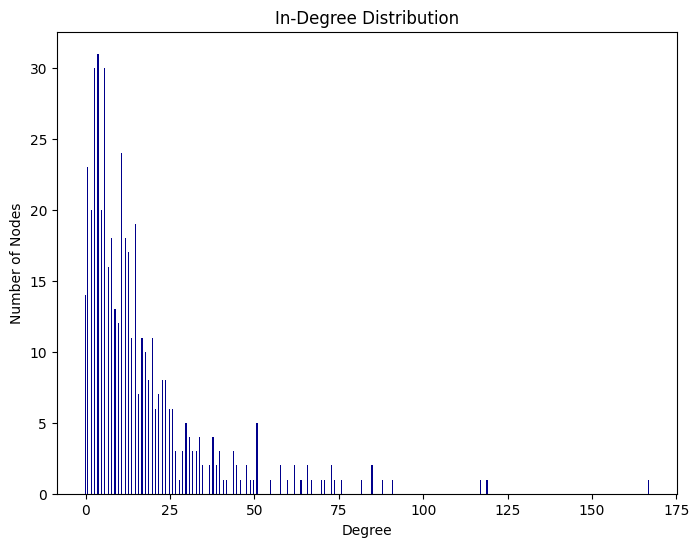

In [ ]:
# Compute the in-degrees

in_degrees = G.in_degree()
in_values = sorted([d for n, d in in_degrees])

# By choosing 500 bins, we are able to effectively evaluate the distribution
n_bins = 500
in_counts, in_bins = np.histogram(in_values, n_bins)

# Plot the distribution

plt.figure(figsize=(8,6))
plt.bar(in_bins[:-1], in_counts, width=np.diff(in_bins), color='darkblue')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In-Degree Distribution')
plt.show()

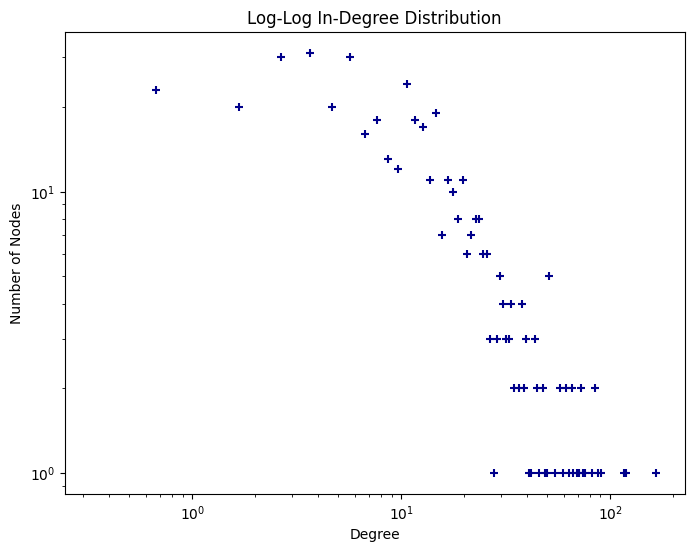

In [ ]:
# Plot the log-log distribution

plt.figure(figsize=(8,6))
plt.scatter(in_bins[:-1], in_counts, marker='+', color = 'darkblue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Log-Log In-Degree Distribution')
plt.show()

In the first plot, we observe that our in-degree distribution has an aproximate heavy-tail behaviour and, thus, we can conclude that the network is aproximately scale-free. This makes sense since we have some very influential rock artists that are referenced by many others, giving rise to hubs. It is important to point out that the mechanism of preferencial attachment is very visible in this network, as more popular bands are increasingly more referenced due to their higher influence.

In the log-log plot we can observe that the distribution shows a partial alignment with a straight line, which also support the claim that a power-law distribution is present. However, the fit is not perfect, as expected when dealing with real-world data, which rarely follows an idealized power law exactly.   

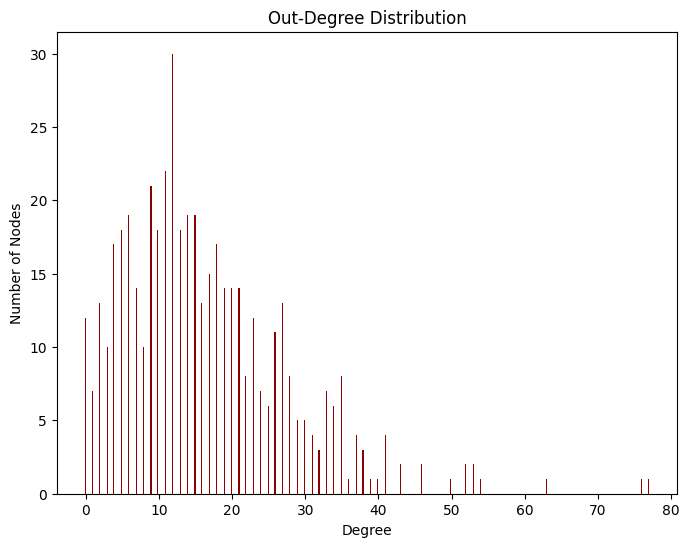

In [ ]:
# Compute the out-degrees

out_degrees = G.out_degree()
out_values = sorted([d for n, d in out_degrees])

# Plot the distribution

out_counts, out_bins = np.histogram(out_values, n_bins)
plt.figure(figsize=(8,6))

plt.bar(out_bins[:-1], out_counts, width=np.diff(out_bins), color='darkred')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Out-Degree Distribution')
plt.show()

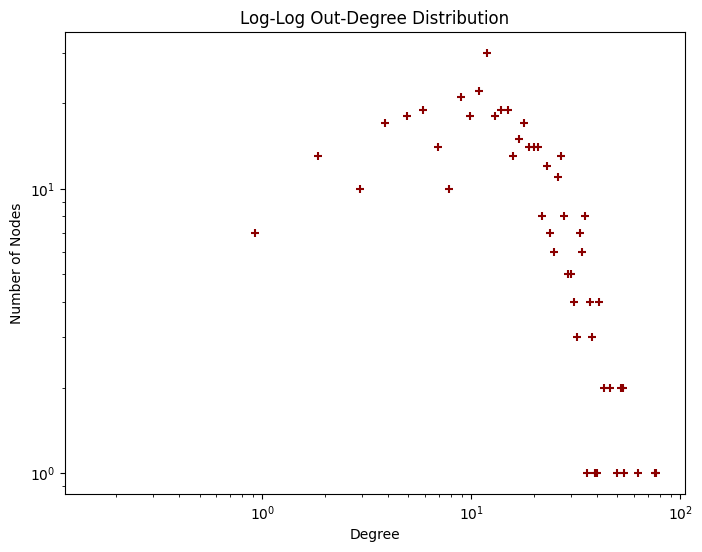

In [ ]:
# Plot the log-log distribution

plt.figure(figsize=(8,6))
plt.scatter(out_bins[:-1], out_counts, marker='+', color = 'darkred')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Log-Log Out-Degree Distribution')
plt.show()

We can observe, in the first plot, that the out-degree distribution has a Poisson-like bulk, suggesting the presence of some random network features. However, the long tail with high degree nodes deviates from a pure Poisson shape, indicating the existence of hubs. In fact, these hubs exist due to some rare wikipages with a high ammount of links. 
This behaviour can be understood if we consider that the majority of wikipages have a reasonable ammount of links. It results from the the equilibrium that pages cannot have many links, as the reader would lose interest in the page, and that almost every artist has some sort of relationship with some other perfomers. Therefore, we obtain the aproximately Poison shaped curve we observe. 

The log-log plot further confirms this claim, since we cannot observe a straight line pattern and, thus, there is no evidence that preferential attachement occurs instead of random connections. In fact, this plot can be asociated with a sublinear regime, where hubs do not dominate, like in our outward network case, as the curve folows an approximately stretched exponential distribution.

To better understand the differences between the in and out-degree distributions, the following plot was obtained.

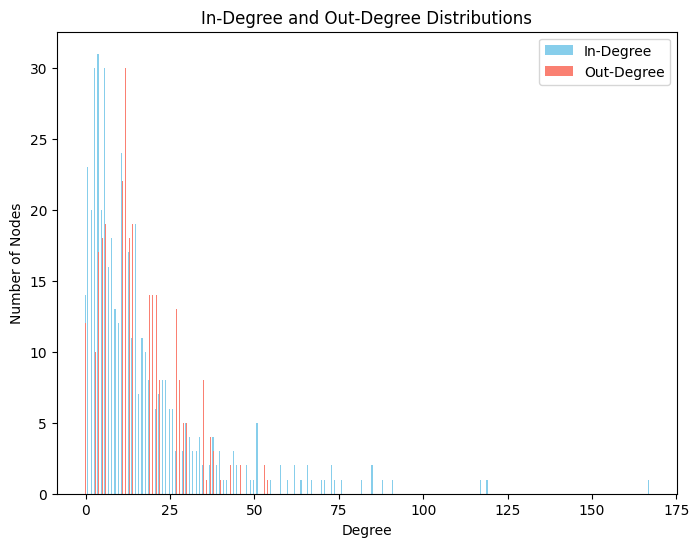

In [23]:
plt.figure(figsize=(8,6))
plt.bar(in_bins[:-1], in_counts, width=np.diff(in_bins), color='skyblue', label='In-Degree')
plt.bar(out_bins[:-1], out_counts, width=np.diff(out_bins), color='salmon', label='Out-Degree')

plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In-Degree and Out-Degree Distributions')
plt.legend()
plt.show()

We observe that the in and out-degree distributions have different shapes. As mentioned above, we concluded that, for the in-degree, a power law behaviour can be observed, while for the out-degree, a Poison would be a better fit. 

In this plot, it is also possible to highlight that in the in-degree distribution we can observe the presence of nodes with a higher degree (167, calculated below) than in the out-degree (77). This can be explained by the fact that it does not make sense for a Wikipedia page to have too many links, as it would get too heavy and confusing for the reader. However, there can be an arbitraly large number of wikipages connecting to a given page, with no consequences. 
That is why we observe the presence of more hubs with a higher degree in the in-degree distribution. 

> * Compare the out-degree distribution to a random network with the same number of nodes and links.


In [67]:
# Random network

n = num_nodes      
M = num_links     

G_rand = nx.Graph()
G_rand.add_nodes_from(range(n))

edges = set()

while len(edges) < M:
    # We randomly choose 2 nodes to be added to the network and create an edge between them
    u, v = random.sample(range(n), 2)  
    edge = tuple(sorted((u, v)))       
    edges.add(edge)                    

G_rand.add_edges_from(edges)

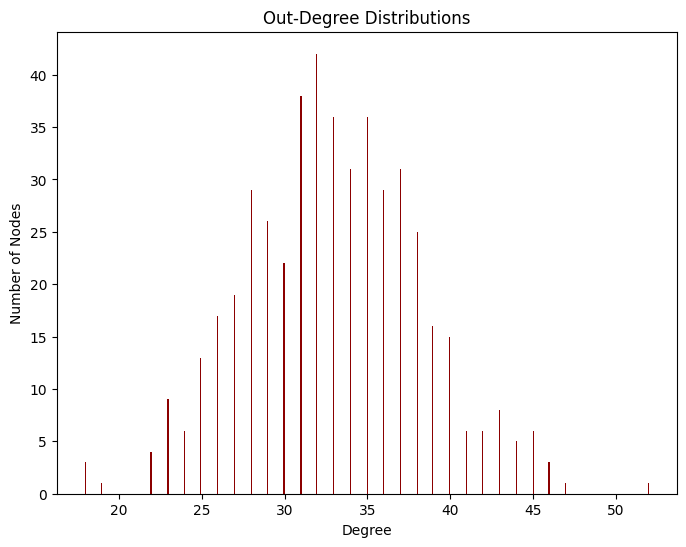

In [68]:
# Compute the degree

out_degrees_rand = G_rand.degree()
out_values_rand = sorted([d for n,d in out_degrees_rand])

out_counts_rand, out_bins_rand = np.histogram(out_values_rand, n_bins)

# Plot the degree distribution

plt.figure(figsize=(8,6))
plt.bar(out_bins_rand[:-1], out_counts_rand, width=np.diff(out_bins_rand), color='darkred')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Out-Degree Distributions')
plt.show()


As can be seen int the plot, the degree distribution of a random network follows a Poison distribution. 
Our out-degree distribution resembles this behavior in the central bulk, where most bands influence only a small number of others, clustered around the mean out-degree. This Poisson shape suggests that, for the majority of bands, influence relationships are distributed in a manner similar to a random process. However, we observe in the real data the presence of a heavy-tail, which is not included in this plot. 
These hubs reflect the real structure of the music scene. Popular bands, such as Alice in Chains, naturally influence many others and therefore break the assumptions of a purely Poisson model.

> * Compare the in-degree distribution to a scale-free network with the same number of nodes.

To build a scale-free network, we used the Albert-Barabási model developed in Week 3 exercises.

In [73]:
# Scale free network

G_scale_free = nx.Graph()
G_scale_free.add_edge(1, 2)

n = 3
edge_list = np.array((G_scale_free.edges())).flatten().tolist()
new_edge = False

while n < num_nodes +1 :
    if new_edge:
        edge_list.append(n)
        edge_list.append(con_node)
    # Nodes that with more edges appear more times in the list, and, thus, are 
    # more likely to be choosen to build new connections
    con_node = np.random.choice(edge_list)
    new_edge = (n, con_node)
    G_scale_free.add_edge(*new_edge)
    n += 1 

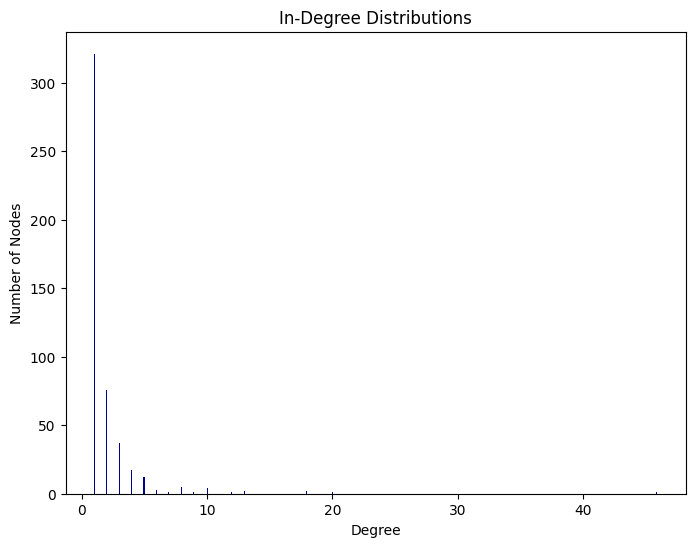

In [74]:
# Compute the degree

in_degrees_scale_free = G_scale_free.degree()
in_values_scale_free = sorted([d for n,d in in_degrees_scale_free])

in_counts_scale_free, in_bins_scale_free = np.histogram(in_values_scale_free, n_bins)

#Plot the distribution

plt.figure(figsize=(8,6))
plt.bar(in_bins_scale_free[:-1], in_counts_scale_free, width=np.diff(in_bins_scale_free), color='darkblue')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In-Degree Distributions')
plt.show()

The degree distribution observed in the plot follows a power law distribution and closely resembles our in-degree distribution, reinforcing the claim that the inward rock band network exhibits scale-free properties. In both cases, we observe the presence of hubs, reflected in the heavy-tailed nature of the distributions. This behavior is particularly expected for the in degree distribution, where a “rich get richer” dynamic applies. In this case, bands that are already frequently referenced are more likely to attract even more references over time. As a result, highly popular and influential bands accumulate a disproportionate number of connections, forming the hubs that make-up a scale-free structure. 

> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [ ]:
# Compute the maximum in-degree and respective node

in_degrees_dict = dict(G.in_degree())
max_in_degree_node = max(in_degrees_dict, key = in_degrees_dict.get)
max_deg = in_degrees[max_in_degree_node]

print('Maximum number of inward connections:' , max_deg)
print('Corresponding band:', max_in_degree_node)

Maximum number of inward connections: 167
Corresponding band: the beatles


Having The Beatles as the most referenced band was expected, because, due to their high popularity, they have influenced many other artists and, thus, are referenced in other wikipages many times.

In [84]:
# Compute the maximum out-degree and respective node

out_degrees_dict = dict(G.out_degree())
max_out_degree_node = max(out_degrees_dict, key = out_degrees_dict.get)
max_deg_out = out_degrees[max_out_degree_node]

print('Maximum number of outward connections:', max_deg_out)
print('Corresponding band:', max_out_degree_node)

Maximum number of outward connections: 77
Corresponding band: alice in chains


Alice in chains is part of the "big four" Seattle grunge bands of the 1990s. 
The band is associated with different musical styles, like grunge and metal and with many other bands, such as Nirvana and Pearl Jam. Thus, the huge ammount of relationships the band had in the music world results in the presence of many references in their wikipage.

> * What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [26]:
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['length_of_content'], reverse=True)
top_10_nodes = sorted_nodes[:10]
for node, data in top_10_nodes:
    print(f"Node: {node}, {'lenght of content'}={data['length_of_content']}")

Node: guns n' roses, lenght of content=55049
Node: coldplay, lenght of content=42257
Node: queen (band), lenght of content=41943
Node: marilyn manson (band), lenght of content=41599
Node: the rolling stones, lenght of content=39786
Node: u2, lenght of content=39117
Node: bob dylan, lenght of content=38848
Node: david bowie, lenght of content=38170
Node: paul mccartney, lenght of content=38107
Node: elton john, lenght of content=37536


We observe that the top 10 artists with more content on Wikipedia are some of the most famous perfomers ever. This is understandable, since there is more to write about artists with more impactful careers.

> *Exercises*: Let's build a simple visualization of the network

Build undirected graph.

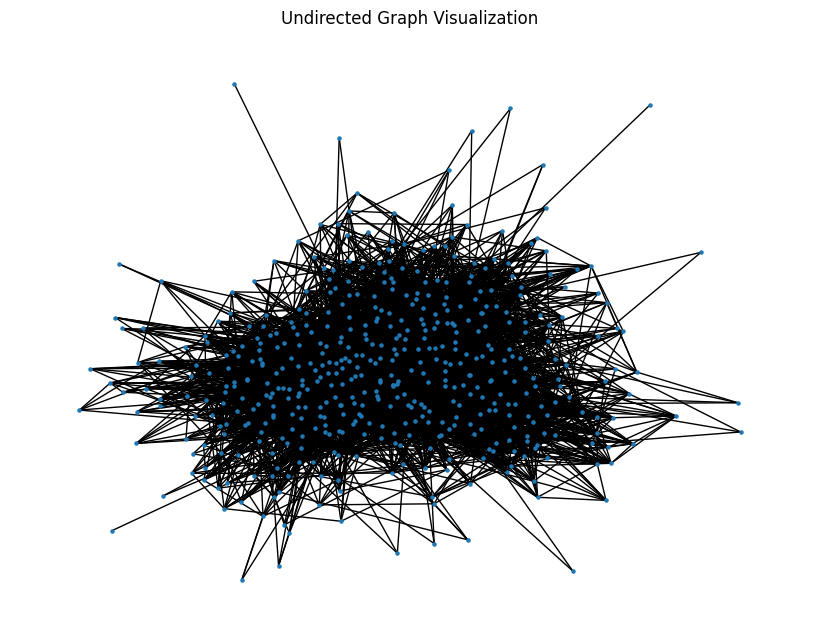

In [82]:
G_und=G.to_undirected(reciprocal=False, as_view=False)

plt.figure(figsize=(8, 6))
nx.draw(G_und, node_size=5)
plt.title("Undirected Graph Visualization")
plt.show()

In [83]:
import matplotlib.pyplot as plt

pos_springf=nx.spring_layout(G_und, seed=42, method="force")

degrees_und=dict(G_und.degree())
node_sizes=np.array(list(degrees_und.values()))*0.5

att_und=nx.get_node_attributes(G_und, 'length_of_content')
node_colors=list(att_und.values())


plt.figure(figsize=(8, 6))
nodes=nx.draw_networkx_nodes(G_und, pos=pos_springf, node_size=node_sizes, node_color=node_colors,cmap=plt.cm.plasma)
nx.draw_networkx_edges(G_und, pos=pos_springf, alpha=0.1)

plt.colorbar(nodes, label="Content length")
plt.title("Undirected Graph Visualization (method=force)")
plt.axis("off")
plt.show()

TypeError: spring_layout() got an unexpected keyword argument 'method'